In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [4]:
# five point summary
#min value, 25th, 50th, 75th percentile and max value

np.quantile(salary, [0,0.25,0.50,0.75,1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [9]:
df = pd.DataFrame(salary, columns = ['Salary'])
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [8]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


Text(0.5, 1.0, 'Box Plot')

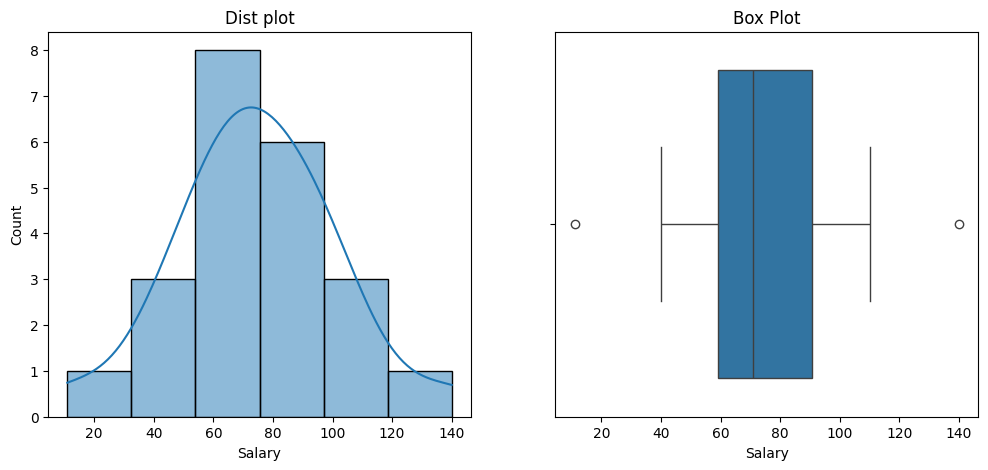

In [10]:
#to check outliers >> distplot and boxplot

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'], kde = True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Salary')
plt.title('Box Plot')

In [ ]:
# here the distribution is not skewed as the outliers are on both the sides
# in box plot, we see there are outliers

# dropping the outlier
#capping the outlier 
#replace with mean and median

In [16]:
#dropping the outlier
Q1 = df["Salary"].quantile (0.25)
Q3 = df["Salary"].quantile (0.75)

IQR = Q3-Q1

lower_fence = Q1 - 1.5*IQR 
upper_fence = Q3 + 1.5*IQR 

df_filtered = df[(df.Salary >= lower_fence)& (df.Salary <= upper_fence)]

In [17]:
df.shape

(22, 1)

In [18]:
df_filtered.shape

(20, 1)

Text(0.5, 1.0, 'Box Plot')

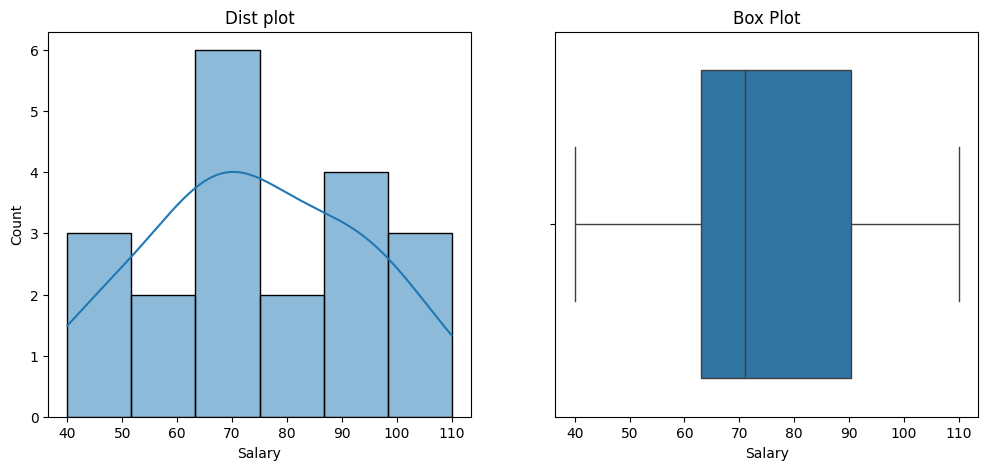

In [20]:
#lets check for outliers now 
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['Salary'], kde = True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x = 'Salary')
plt.title('Box Plot')

#as in the graph not outliers are present now 

In [19]:
#imputation with mean and median
df['Salary_impuuted_mean'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])

Text(0.5, 1.0, 'Box Plot')

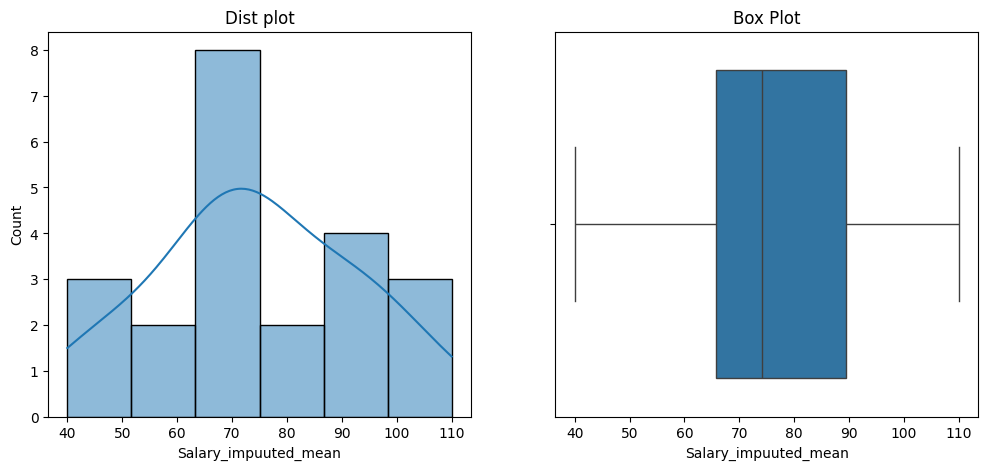

In [21]:
#lets check for outliers now 
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_impuuted_mean'], kde = True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Salary_impuuted_mean')
plt.title('Box Plot')

In [22]:
#now treating with median
df['Salary_impuuted_median'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].median(), df['Salary'])

Text(0.5, 1.0, 'Box Plot')

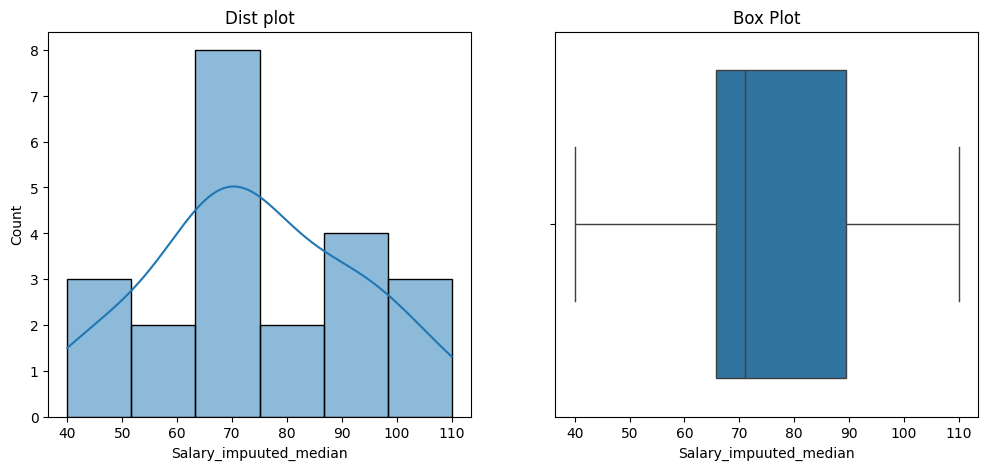

In [23]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary_impuuted_median'], kde = True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Salary_impuuted_median')
plt.title('Box Plot')

In [24]:
#capping >> replacing the nearest value which is not outlier
df

,Salary,Salary_impuuted_mean,Salary_impuuted_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [25]:
lower_cap = df['Salary'].quantile(0.05)
upper_cap = df['Salary'].quantile(0.95)

In [26]:
lower_cap, upper_cap

(40.25, 109.55)

In [28]:
#replace the outlier with cap value 

df["salary_capped"] = np.where(df["Salary"]< lower_cap, lower_cap,
            np.where(df['Salary']>upper_cap,upper_cap,df['Salary']))

In [29]:
df["salary_capped"]


0      40.25
1      40.25
2      45.00
3      68.00
4      65.00
5      68.00
6      78.00
7      90.00
8      57.00
9      74.00
10     91.00
11     92.00
12     88.00
13     68.00
14     57.00
15     48.00
16     99.00
17    101.00
18     68.00
19     77.00
20    109.55
21    109.55
Name: salary_capped, dtype: float64

Text(0.5, 1.0, 'Box Plot')

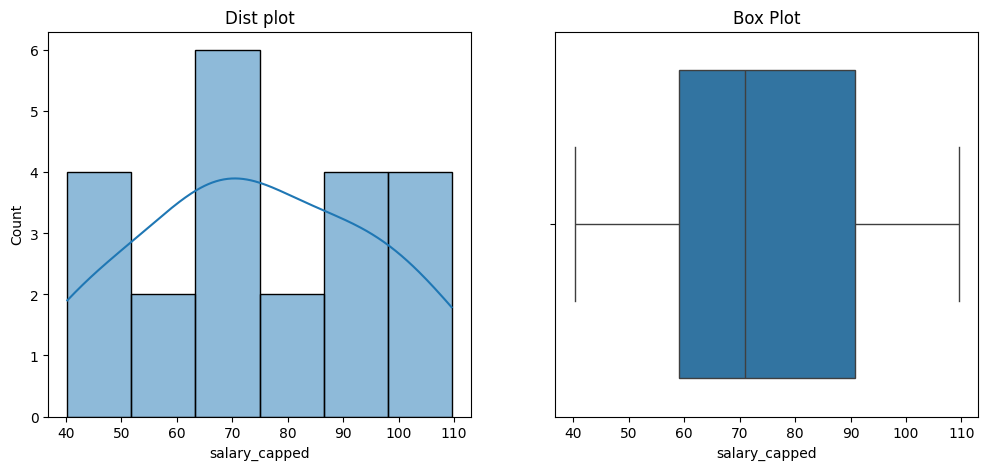

In [30]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary_capped"], kde = True)
plt.title('Dist plot')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "salary_capped")
plt.title('Box Plot')